# **Regression and Optimization (Linear and Logistic regression)**

##**OBJECTIVE:**
To implement and optimize linear regression and logistic regression models using real-world datasets and analyze their performance.

##**SCENARIO 1:**
Predict ocean water temperature using environmental and depth-related features.

**Dataset (Kaggle – Public)**: [Dataset](https://www.kaggle.com/datasets/sohier/calcofi)

**Target Variable:**

•	Water Temperature (T_degC)
**Sample Input Features**

•	Depth (m)

•	Salinity

•	Oxygen

•	Latitude

•	Longitude



Rows ready for training: 1000
Rohith John 24BAD100

--- Model Performance ---
Mean Squared Error (MSE): 1.06
Accuracy (R2 Score): 0.8841


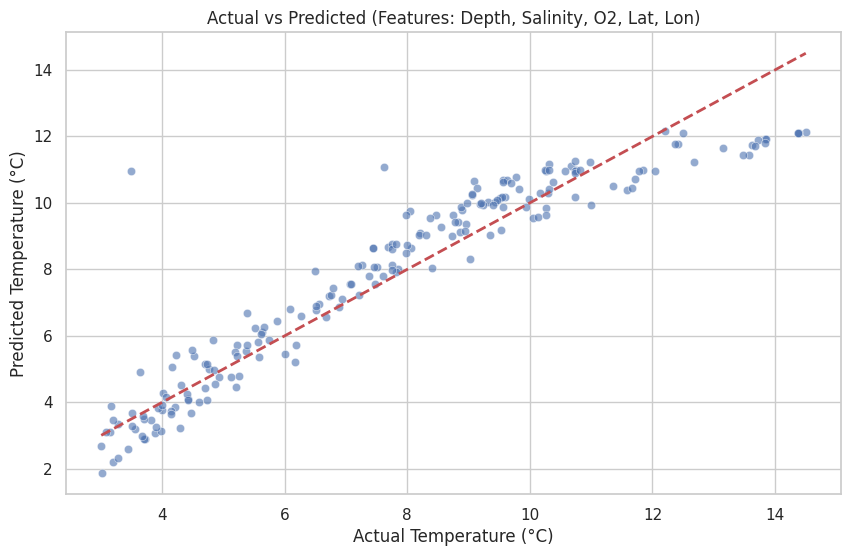

In [ ]:
#Import necessary Python libraries (NumPy, Pandas, Matplotlib, Seaborn, Scikit-learn).
##Rohith John 24BAD100
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Load a LARGER chunk of data to find valid rows
bottle = pd.read_csv('bottle.csv', nrows=20000)
cast = pd.read_csv('cast.csv', nrows=20000)

#Merge Dataframes on 'Cst_Cnt' to access metadata(latitude and longitude) in cast.csv file
df = pd.merge(bottle, cast, on='Cst_Cnt', how='left')

#Select Features
features = ['Depthm', 'Salnty', 'O2ml_L', 'Lat_Dec', 'Lon_Dec']
target = 'T_degC'

data = df[features + [target]]

#Handle Missing Values (Smart Cleaning)
# Drop rows ONLY if they are missing values in our specific feature columns
data_clean = data.dropna(subset=features + [target])
#Rohith John 24BAD100
#Limit to 1000 rows for the Lab
#consider first 1000 valid samples
if len(data_clean) > 1000:
    data_clean = data_clean.iloc[:1000]

print(f"Rows ready for training: {len(data_clean)}")

if len(data_clean) == 0:
    print("Error: Still couldn't find good data. Please check the dataset files.")
else:
    # --- PROCEED WITH MODELING ---

    #Feature Scaling
    scaler = StandardScaler()
    X = data_clean[features]
    y = data_clean[target]

    # Split Data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale Data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    #Train Linear Regression
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    #Predict and Evaluate
    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("Rohith John 24BAD100")
    print("\n--- Model Performance ---")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Accuracy (R2 Score): {r2:.4f}")

    # Visualizing the Result
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel("Actual Temperature (°C)")
    plt.ylabel("Predicted Temperature (°C)")
    plt.title("Actual vs Predicted (Features: Depth, Salinity, O2, Lat, Lon)")
    plt.show()

##**SCENARIO 2:**

Classify whether LIC stock price will increase (1) or decrease (0) based on historical data.

**Dataset (Kaggle – Public):**
https://www.kaggle.com/datasets/debashis74017/lic-stock-price-data

**Target Variable (Derived):**

• Price Movement

– 1 → Closing price > Opening price

– 0 → Closing price ≤ Opening price

Input Features:
• Open

• High

• Low

• Volume


Successfully loaded LICI - Daily data.csv
Columns found in file: ['date', 'open', 'high', 'low', 'close']
Target variable 'price_movement' created.
Using features for training: ['open', 'high', 'low']

--- Model Evaluation ---
Accuracy:  0.8000
Precision: 0.0000
Recall:    0.0000
F1 Score:  0.0000


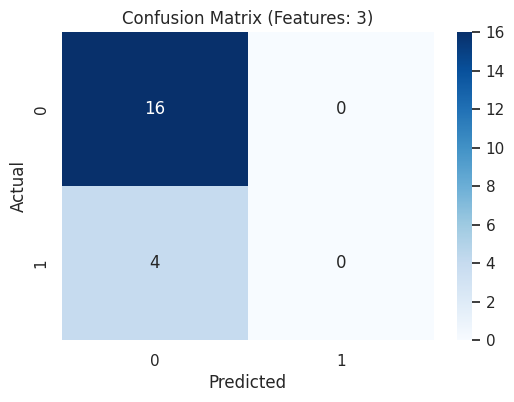

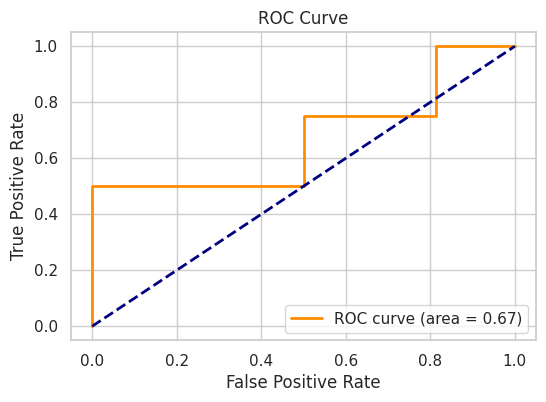

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, roc_curve, auc)
#Rohith John 24BAD100
# 1. Load Data
# Updated to match your exact filename
filename = 'LICI - Daily data.csv'

try:
    df = pd.read_csv(filename)
    print(f"Successfully loaded {filename}")
except FileNotFoundError:
    print(f"Error: Could not find '{filename}'. Please check the file name in your upload folder.")
    # Stop execution if file isn't found
    raise

# 2. Standardize Column Names
# This handles variations like " Open" or "High " automatically
df.columns = df.columns.str.lower().str.strip()

print("Columns found in file:", df.columns.tolist())

# 3. Create Target Variable (Price Movement)
# 1 if Close > Open, else 0
if 'open' in df.columns and 'close' in df.columns:
    df['price_movement'] = np.where(df['close'] > df['open'], 1, 0)
    print("Target variable 'price_movement' created.")
else:
    print("Error: 'open' or 'close' columns missing! Check CSV headers.")

# 4. Smart Feature Selection
# We start with the preferred list
preferred_features = ['open', 'high', 'low', 'volume']

# We only keep the features that ACTUALLY exist in your file
features = [f for f in preferred_features if f in df.columns]

print(f"Using features for training: {features}")

if len(features) == 0:
    print("Error: No valid input features found!")
else:
    # --- PROCEED WITH MODEL ---

    # Drop rows with missing values in our selected features
    df_clean = df.dropna(subset=features)

    X = df_clean[features]
    y = df_clean['price_movement']

    # 5. Scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 6. Split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # 7. Train Logistic Regression
    log_reg = LogisticRegression(random_state=42)
    log_reg.fit(X_train, y_train)

    # 8. Predict & Evaluate
    y_pred = log_reg.predict(X_test)
    #rRohith John 24BAD100
    print("\n--- Model Evaluation ---")
    print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, zero_division=0):.4f}")
    print(f"Recall:    {recall_score(y_test, y_pred, zero_division=0):.4f}")
    print(f"F1 Score:  {f1_score(y_test, y_pred, zero_division=0):.4f}")

    # 9. Visualization: Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (Features: {len(features)})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # 10. Visualization: ROC Curve
    # Only plot if we have both classes (0 and 1) in the test set
    if len(np.unique(y_test)) > 1:
        y_prob = log_reg.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc="lower right")
        plt.show()

In [ ]:
print("\n--- Starting Hyperparameter Optimization ---")
print("Rohith John 24BAD100")
# Define the parameter grid
# 'C': Smaller values specify stronger regularization.
# 'penalty': 'l2' is standard, 'l1' is useful for feature selection (requires specific solvers)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs'] # Standard solver for l2
}

# Initialize Grid Search with 5-fold Cross-Validation
grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000),
                           param_grid, cv=5, scoring='accuracy')

# Fit to training data
grid_search.fit(X_train, y_train)

# Output Results
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Accuracy from Grid Search: {grid_search.best_score_:.4f}")

# Train a new model with the best parameters
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("\nOptimized Model Accuracy on Test Set:", accuracy_score(y_test, y_pred_best))


--- Starting Hyperparameter Optimization ---
Rohith John 24BAD100
Best Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Accuracy from Grid Search: 0.8458

Optimized Model Accuracy on Test Set: 0.9
